### Before starting, you need to have the opendatasets library installed in your system

In [28]:
pip install opendatasets

Note: you may need to restart the kernel to use updated packages.


You should consider upgrading via the 'C:\Users\nadaa\anaconda3\anaconda\python.exe -m pip install --upgrade pip' command.


In [ ]:
# od.download("https://www.kaggle.com/rashikrahmanpritom/heart-attack-analysis-prediction-dataset")


### Import the opendatasets library

In [1]:
import opendatasets as od
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression


## Read File

In [2]:
df=pd.read_csv('Downloads/heart.csv',sep=';')
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,Up,0


### Attribute Information
- Age: age of the patient [years]
- Sex: sex of the patient [M: Male, F: Female]
- ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]
- RestingBP: resting blood pressure [mm Hg]
- Cholesterol: serum cholesterol [mm/dl]
- FastingBS: fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]
- RestingECG: resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]
- MaxHR: maximum heart rate achieved [Numeric value between 60 and 202]
- ExerciseAngina: exercise-induced angina [Y: Yes, N: No]
- ST_Slope: the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]
- HeartDisease: output class [1: heart disease, 0: Normal]

In [3]:
len(df)

918

## Clean Data

In [6]:
#Display the information of data frame
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Age             918 non-null    int64 
 1   Sex             918 non-null    object
 2   ChestPainType   918 non-null    object
 3   RestingBP       918 non-null    int64 
 4   Cholesterol     918 non-null    int64 
 5   FastingBS       918 non-null    int64 
 6   RestingECG      918 non-null    object
 7   MaxHR           918 non-null    int64 
 8   ExerciseAngina  918 non-null    object
 9   ST_Slope        918 non-null    object
 10  HeartDisease    918 non-null    int64 
dtypes: int64(6), object(5)
memory usage: 79.0+ KB


In [8]:
# Display type of each column in data frame
df.dtypes

Age                int64
Sex               object
ChestPainType     object
RestingBP          int64
Cholesterol        int64
FastingBS          int64
RestingECG        object
MaxHR              int64
ExerciseAngina    object
ST_Slope          object
HeartDisease       int64
dtype: object

In [4]:
# Check the null values
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
# Removing duplicate 
df.drop_duplicates(inplace=True)

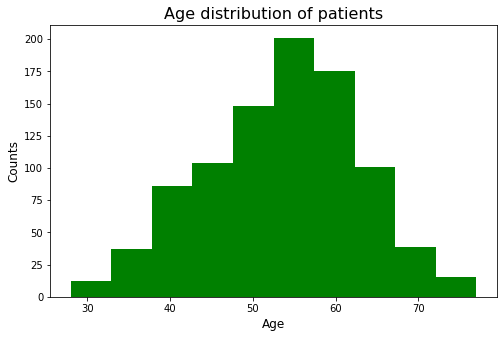

In [11]:
df.Age.value_counts()
plt.figure(figsize=[8,5]);
plt.hist(data = df, x = "Age",color='green');
plt.xlabel("Age", size = 12);
plt.ylabel("Counts", size = 12);
plt.title("Age distribution of patients", size = 16);

In [12]:
df.HeartDisease.value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

### Class Target

Text(0.5, 0, 'HeartDisease')

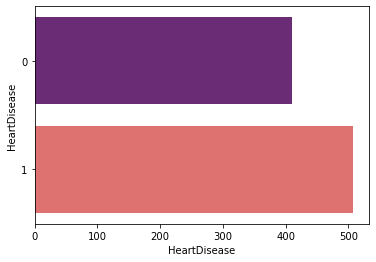

In [13]:
ax = sns.countplot(y="HeartDisease", data=df ,palette="magma")
plt.xlabel('HeartDisease')


### Convert categorical variables

In [27]:
data= pd.get_dummies(df,columns = ['Sex'])
data.head(9)

,Age,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,ST_Slope,HeartDisease,Sex_F,Sex_M
0,40,ATA,140,289,0,Normal,172,N,Up,0,0,1
1,49,NAP,160,180,0,Normal,156,N,Flat,1,1,0
2,37,ATA,130,283,0,ST,98,N,Up,0,0,1
3,48,ASY,138,214,0,Normal,108,Y,Flat,1,1,0
4,54,NAP,150,195,0,Normal,122,N,Up,0,0,1
5,39,NAP,120,339,0,Normal,170,N,Up,0,0,1
6,45,ATA,130,237,0,Normal,170,N,Up,0,1,0
7,54,ATA,110,208,0,Normal,142,N,Up,0,0,1
8,37,ASY,140,207,0,Normal,130,Y,Flat,1,0,1


In [5]:
# Separating features from the target we want to predict
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']
# Performing one-hot encoding for the categorical features
X = pd.get_dummies(X, drop_first=True)

## Split Data

In [6]:
# Splitting our data into train/test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [7]:
X_train.shape,y_train.shape

((734, 14), (734,))

## Training Machine Learning Models

![alt text](Downloads/sigmoid-activation-function.jpg) 

In [8]:
lm_model = LogisticRegression()
lm_model.fit(X_train, y_train)

C:\Users\nadaa\anaconda3\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [9]:
accuracy_train_set = lm_model.score(X_train, y_train)  
print("Logistic Regression Model, Accuracy (Train Set) : ", accuracy_train_set)

Logistic Regression Model, Accuracy (Train Set) :  0.8610354223433242


## Test

In [10]:
y_pred=lm_model.predict(X_test)
lm_model.score(X_test, y_test)


0.8478260869565217